### Feature Selection using Variance Threshold Approach for SVM Classifier

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split

Number of samples:  1797
Number of attributes:  64
Classes:  [0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

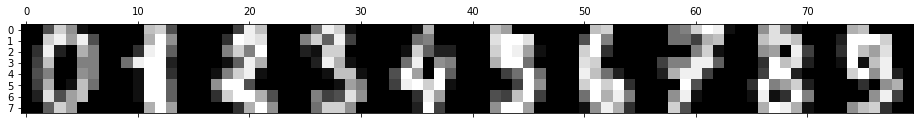

In [12]:
digit_data = ds.load_digits()

print("Number of samples: ", digit_data.data.shape[0])
print("Number of attributes: ", digit_data.data.shape[1])
print("Classes: ", digit_data.target_names)

c = digit_data.images[0]
for i in range(1, 10):
    c = np.concatenate((c, digit_data.images[i]), 1)

plt.gray() 
plt.matshow(c)
plt.show()

In [13]:
X, y = digit_data.data, digit_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=20)

print("Number of training samples: ", X_train.shape[0])
print("Number of testing samples: ", X_test.shape[0])

Number of training samples:  1437
Number of testing samples:  360


In [14]:
def train(X, y):
    
    classifier = SVC(kernel='linear')
    classifier = classifier.fit(X,y)  # fit the classifier on training set
    
    preds = classifier.predict(X)  # predict the labels for training set
    
    train_accuracy = np.sum(y == preds) / len(y)  # calculate the accuracy (do not use built-in function)
    
    return classifier, train_accuracy

def test(classifier, X, y):
    
    preds = classifier.predict(X)
    test_accuracy = np.sum(y == preds) / len(y) # calculate the accuracy on test set
    
    return test_accuracy

In [15]:
# SVM classifier without feature selection
svm, train_acc = train(X_train, y_train) # call train function with necessary parameters
test_acc = test(svm, X_test, y_test)  # call test function with necessary parameters

print("Train acc without feature selection: ", train_acc)
print("Test acc without feature selection: ", test_acc)

Train acc without feature selection:  1.0
Test acc without feature selection:  0.975


In [16]:
def variance_threshold(X, threshold=0):
    
    feature_vars = np.var(X, axis=0) # calculate variances
    selected = np.where(feature_vars >= threshold)[0] # keep the indexes of selected feature
    eliminated = np.where(feature_vars < threshold)[0] # keep the indexes of eliminated features
    X_reduced = X[:,selected] # X with reduced feature set
    
    # calculate variances of each feature and eliminate features with variance lower than threshold.
    
    print("Indexes of the eliminated features: ", eliminated) # print the indexes of eliminated features.
    
    print("Number of features for threshold = ", threshold, "is :", X_reduced.shape[1])
    return X_reduced, selected

In [17]:
thresholds = [1, 5, 10, 20, 40]

for th in thresholds:
    print (' ')
    print("Threshold = ", th)
    X_reduced, selected = variance_threshold(X_train, th)
    X_reduced_test = X_test[:,selected]

    svm, train_acc = train(X_reduced, y_train) # call train function with necessary parameters
    test_acc = test(svm, X_reduced_test, y_test)  # call test function with necessary parameters

    print("Train acc with feature selection: ", train_acc)
    print("Test acc with feature selection: ", test_acc)


 
Threshold =  1
Indexes of the eliminated features:  [ 0  1  8 15 16 23 24 31 32 39 40 47 48 55 56 57]
Number of features for threshold =  1 is : 48
Train acc with feature selection:  1.0
Test acc with feature selection:  0.975
 
Threshold =  5
Indexes of the eliminated features:  [ 0  1  7  8 15 16 23 24 31 32 39 40 47 48 49 55 56 57 63]
Number of features for threshold =  5 is : 45
Train acc with feature selection:  1.0
Test acc with feature selection:  0.975
 
Threshold =  10
Indexes of the eliminated features:  [ 0  1  7  8 15 16 23 24 25 31 32 39 40 41 47 48 49 55 56 57 63]
Number of features for threshold =  10 is : 43
Train acc with feature selection:  1.0
Test acc with feature selection:  0.975
 
Threshold =  20
Indexes of the eliminated features:  [ 0  1  3  4  6  7  8  9 11 14 15 16 17 22 23 24 25 30 31 32 33 38 39 40
 41 46 47 48 49 55 56 57 59 62 63]
Number of features for threshold =  20 is : 29
Train acc with feature selection:  1.0
Test acc with feature selection:  0.97

#### Discussion
* When we remove features that have small variance, they do not affect much on the performance of the model. This is due to the fact that they do not add discriminatory information into the model. And even with a threshold of 20 the model performance improves a bit.
* However, when we eliminate features with a higher treshold, we lose valuable features. Therefor the model does not work as well as before.